In [1]:
# Imports
import add_to_syspath
from tqdm import tqdm

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform
from lucid.modelzoo import vision_base

from audiomnist.models import alexnet
from audiomnist.models.alexnet import build_model
from audiomnist.train.alexnet import get_epoch_checkpoint

from tensorflow.keras import optimizers

In [2]:
K.set_learning_phase(0)
model = build_model()
ckpt = get_epoch_checkpoint("../models/alexnet", 19)
model.load_weights(ckpt)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        11712     
_________________________________________________________________
leaky_relu1 (LeakyReLU)      (None, 55, 55, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 23, 23, 256)       614656    
_________________________________________________________________
leaky_relu2 (LeakyReLU)      (None, 23, 23, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 11, 11, 256)       0         
__________

In [3]:

with K.get_session().as_default():
    vision_base.Model.save(
        save_url="../models/alexnet_lucid/frozen_graph_inference.pb",
        input_name='conv1_input',
        image_shape=[227,227,1],
        output_names=['dense3/Softmax'],
        image_value_range=[0,255]
    )

Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes


Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes


Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants


Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants


INFO:tensorflow:Froze 24 variables.


INFO:tensorflow:Froze 24 variables.


INFO:tensorflow:Converted 24 variables to const ops.


INFO:tensorflow:Converted 24 variables to const ops.


In [4]:
K.set_learning_phase(0)
model = vision_base.Model.load("../models/alexnet_lucid/frozen_graph_inference.pb")

In [5]:
model.show_graph()

In [19]:
obj = lambda T: T("dense3/BiasAdd")[0,0]

def show_feature(layer,n):
    with tf.Graph().as_default() as graph, tf.Session() as sess:
        optimizer = tf.train.AdamOptimizer(0.05)
        T = render.make_vis_T_grad(model,
                             objectives.channel(layer,n),
                             param_f=lambda : param.color.to_valid_rgb(param.spatial.pixel_image((1,227,227,1))),
                             relu_gradient_override=True,
                             optimizer = optimizer)

        loss, grads, vis_op, t_image = T("loss"), T("grads"), T("vis_op"), T("input")
        tf.global_variables_initializer().run()
        norm_gradient = tf.norm(grads[0][0])
        
        try:
            losses = []
            grads_list = []
            for i in tqdm(range(512)):
                loss_,_,n_grad = sess.run([loss,vis_op, norm_gradient])
                losses.append(loss_)
                grads_list.append(n_grad)

            vis=t_image.eval()
            print(loss_)
    
        except KeyboardInterrupt:
            log.warning("Interrupted optimization at step {:d}.".format(i+1))
            vis = t_image.eval()
            show(np.hstack(vis))
            
        plt.figure()
        plt.plot(losses)        
        plt.figure()
        plt.plot(grads_list)
        plt.figure()
        plt.imshow(vis[0,:,:,0])


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.
100%|██████████| 512/512 [01:27<00:00,  5.93it/s]


212.43573


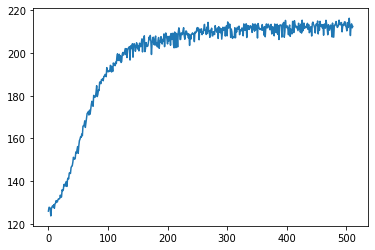

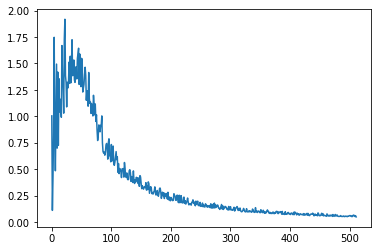

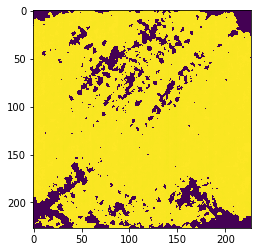

In [10]:
show_feature('leaky_relu1/LeakyRelu',10)

100%|██████████| 512/512 [01:29<00:00,  5.72it/s]


7117.605


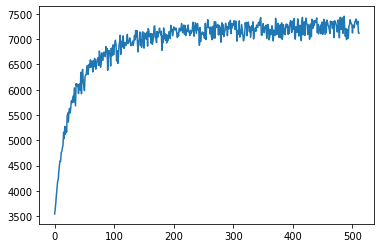

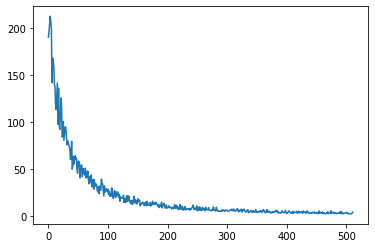

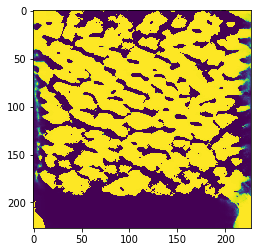

In [11]:
show_feature('leaky_relu2/LeakyRelu',2)

100%|██████████| 512/512 [01:40<00:00,  4.97it/s]


2472.5725


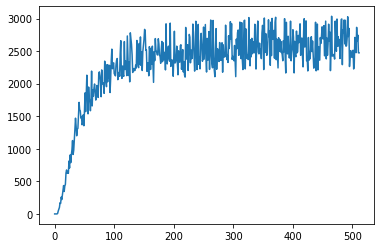

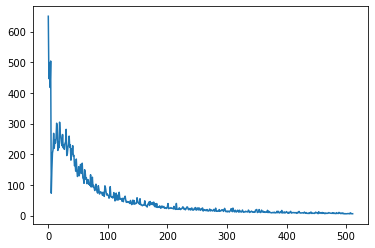

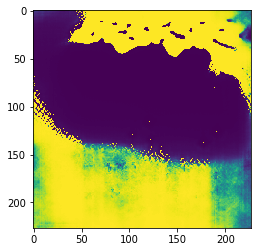

In [12]:
show_feature('conv3/Relu',8)



  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 1/512 [00:00<07:04,  1.20it/s]

  1%|          | 5/512 [00:00<04:59,  1.69it/s]

  2%|▏         | 9/512 [00:01<03:33,  2.36it/s]

  3%|▎         | 13/512 [00:01<02:32,  3.27it/s]

  3%|▎         | 17/512 [00:01<01:50,  4.47it/s]

  4%|▍         | 20/512 [00:01<01:22,  5.97it/s]

  4%|▍         | 23/512 [00:01<01:02,  7.80it/s]

  5%|▌         | 26/512 [00:01<00:48, 10.01it/s]

  6%|▌         | 30/512 [00:01<00:38, 12.43it/s]

  7%|▋         | 34/512 [00:01<00:31, 15.21it/s]

  8%|▊         | 39/512 [00:02<00:25, 18.75it/s]

  8%|▊         | 43/512 [00:02<00:22, 20.94it/s]

  9%|▉         | 47/512 [00:02<00:20, 22.79it/s]

 10%|▉         | 51/512 [00:02<00:18, 25.24it/s]

 11%|█         | 55/512 [00:02<00:16, 27.29it/s]

 12%|█▏        | 59/512 [00:02<00:16, 27.78it/s]

 12%|█▏        | 63/512 [00:02<00:15, 29.27it/s]

 13%|█▎        | 67/512 [00:02<00:15, 29.60it/s]

 14%|█▍        | 71/512 [00:03<00:14, 30.01it/s]

 15%|█▍   

0.0


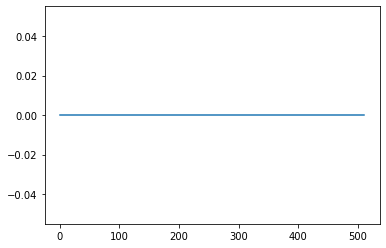

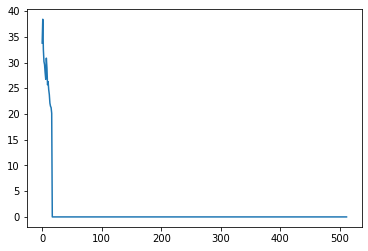

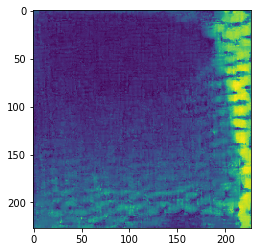

In [21]:
show_feature('conv4/Relu',78)

100%|██████████| 512/512 [01:41<00:00,  5.10it/s]


0.0


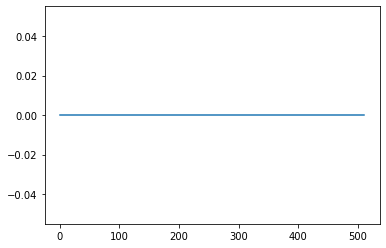

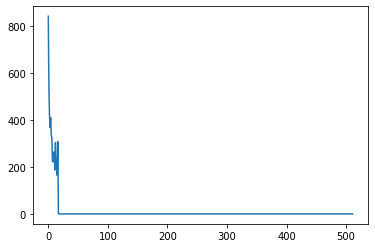

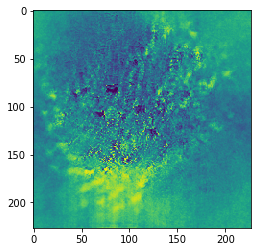

In [15]:
show_feature('conv5/Relu',31)

In [8]:
show_feature('dense1/Relu',1)

  0%|          | 1/512 [00:01<10:23,  1.22s/it]


InvalidArgumentError: Matrix size-incompatible: In[0]: [1,2304], In[1]: [1024,1024]
	 [[node import/dense1/MatMul (defined at /gpfs/workdir/idrissib/lucid/lucid/modelzoo/vision_base.py:184) ]]

Caused by op 'import/dense1/MatMul', defined at:
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-215e87c4b3e9>", line 1, in <module>
    show_feature('dense1/Relu',1)
  File "<ipython-input-7-5a751eb2c8c1>", line 8, in show_feature
    optimizer = optimizer)
  File "/gpfs/workdir/idrissib/lucid/lucid/optvis/render.py", line 175, in make_vis_T_grad
    T = import_model(model, transform_f(t_image), t_image)
  File "/gpfs/workdir/idrissib/lucid/lucid/optvis/render.py", line 332, in import_model
    model.import_graph(t_image, scope=scope, forget_xy_shape=True)
  File "/gpfs/workdir/idrissib/lucid/lucid/modelzoo/vision_base.py", line 184, in import_graph
    self.graph_def, {self.input_name: t_prep_input}, name=scope)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/framework/importer.py", line 442, in import_graph_def
    _ProcessNewOps(graph)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/framework/importer.py", line 235, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3433, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3433, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3325, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/workdir/idrissib/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Matrix size-incompatible: In[0]: [1,2304], In[1]: [1024,1024]
	 [[node import/dense1/MatMul (defined at /gpfs/workdir/idrissib/lucid/lucid/modelzoo/vision_base.py:184) ]]
